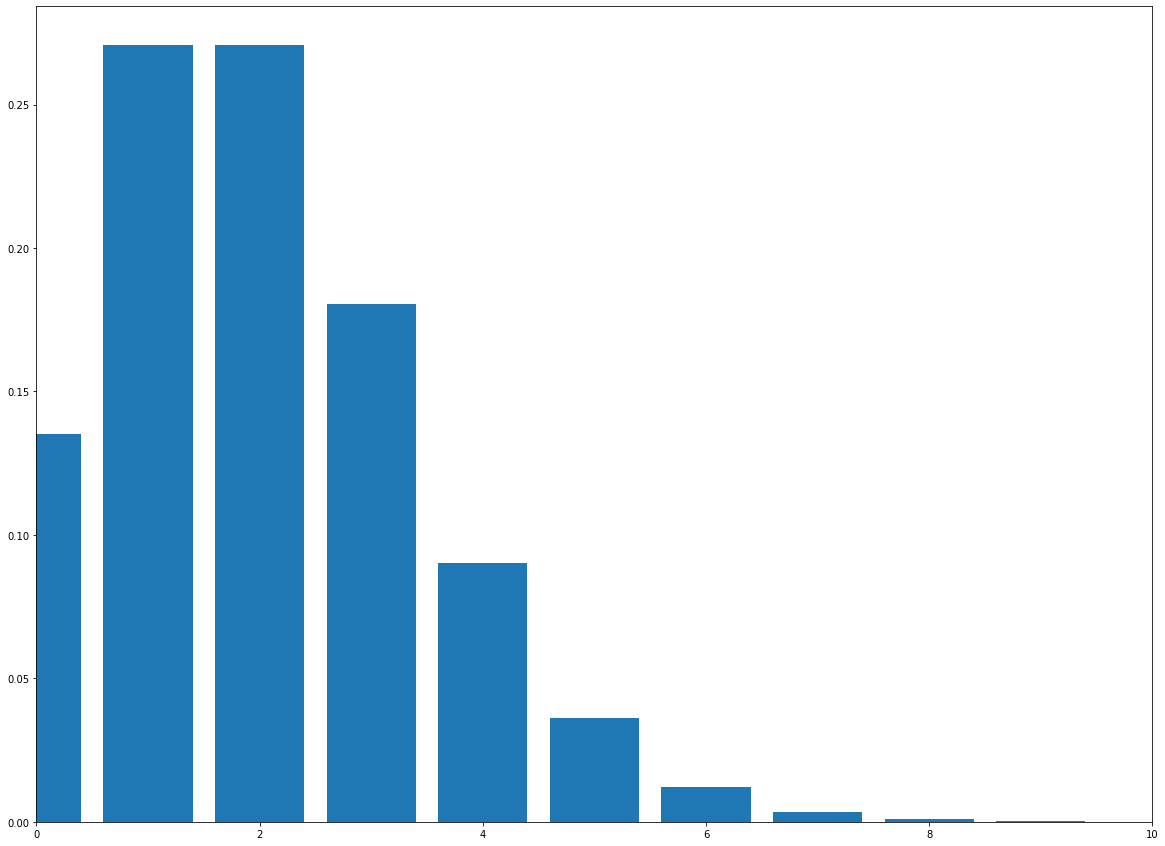

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18.])

In [107]:
# Lab 2 - Kun Lee, partner: Lexie Peterson
#Setup
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.signal
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

d = stats.norm.rvs(loc = 5., scale = 0.01, size = 100000)

fig, ax = plt.subplots(1, 1)
plt.xlim(0,10)

y = np.linspace(0,9,10)
y2 = np.linspace(0,18,19)

base = scipy.stats.poisson.pmf(y,2)
base2 = scipy.signal.convolve(base,base)
ax.bar(y,base)
plt.show()
y2

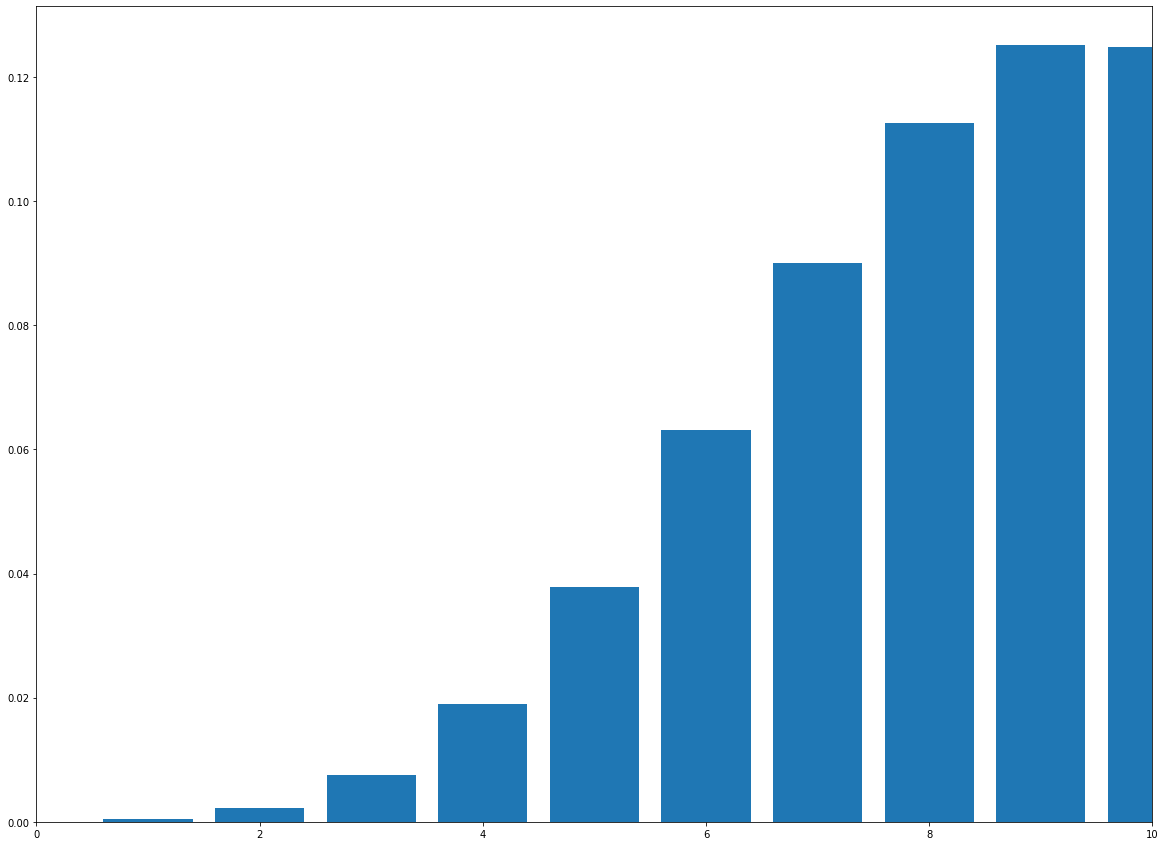

In [95]:
fig, ax = plt.subplots(1, 1)
plt.xlim(0,10)

ax.bar(y2,base2)
plt.show()

Problem 1A: shown above are the plots for day 1 and day 2. 
The mean doubled.

Problem 1B:

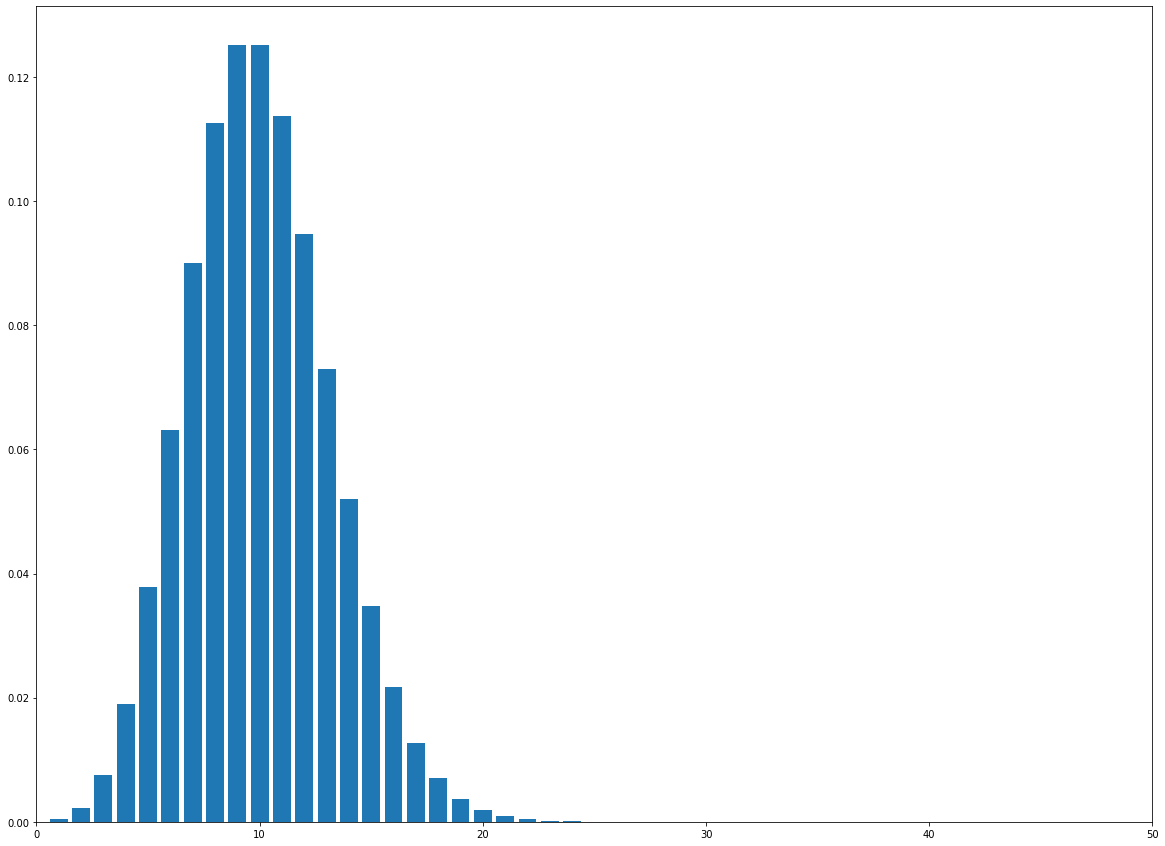

In [82]:
y3 = np.linspace(0,45,46)
day3 = scipy.signal.convolve(base2,base)
day4 = scipy.signal.convolve(day3,base)
day5 = scipy.signal.convolve(day4,base)
fig, ax = plt.subplots(1, 1)
plt.xlim(0,50)
ax.bar(y3,day5)
plt.show()


Above is the distribution for day 5. It looks like a poisson distribution with parameter 10. This makes sense conceptually since the Poisson distribution by definition "describes" independent events that happen at a constant rate. This rate doesn't change, and over 5 days we expect 5 times the events. So if Day 1 ~ Poisson(x1), then Day 5 ~ Poisson(5 * x1). 

Problem 1C:

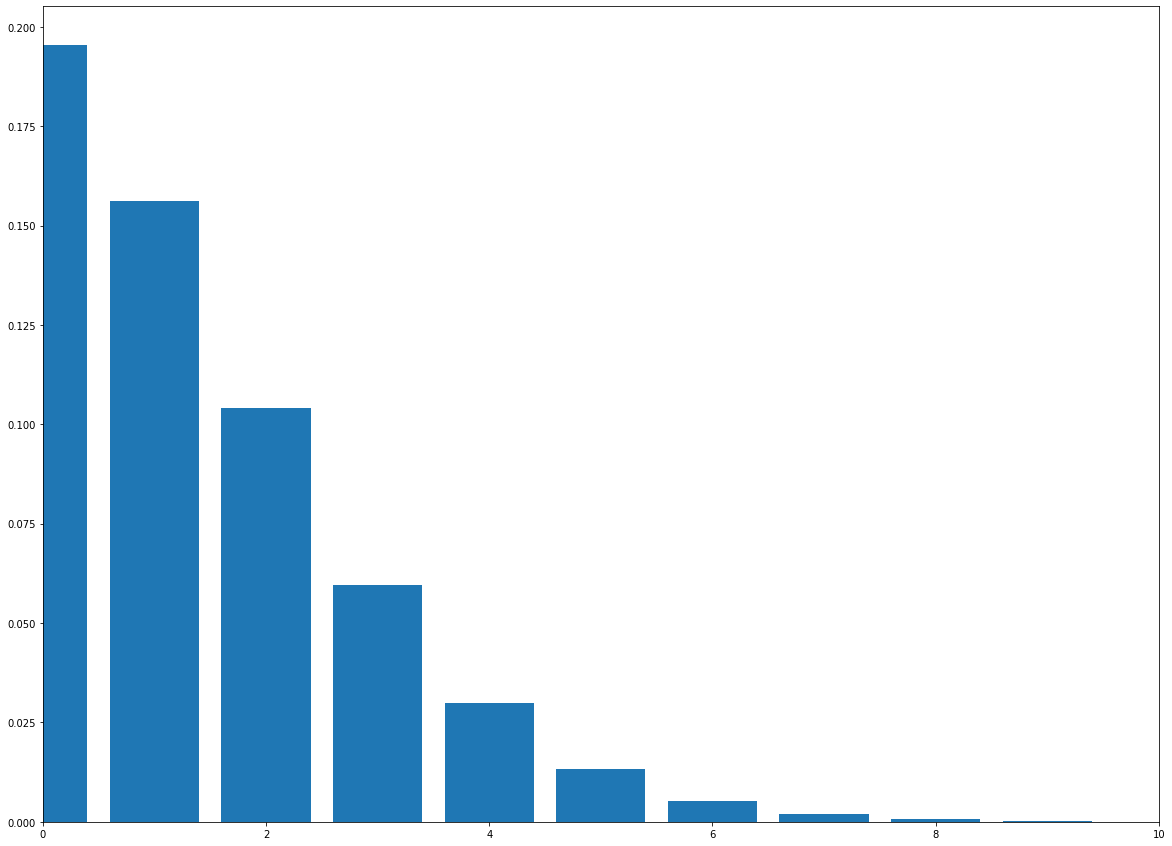

In [126]:
average2 = scipy.signal.convolve(base,base,mode='same')
average3 = scipy.signal.convolve(average2,base,mode='same')
average4 = scipy.signal.convolve(average3,base,mode='same')
average5 = scipy.signal.convolve(average4,base,mode='same')
average = average5

fig, ax = plt.subplots(1, 1)
plt.xlim(0,10)
ax.bar(y,average2)
plt.show()
# 2 day average

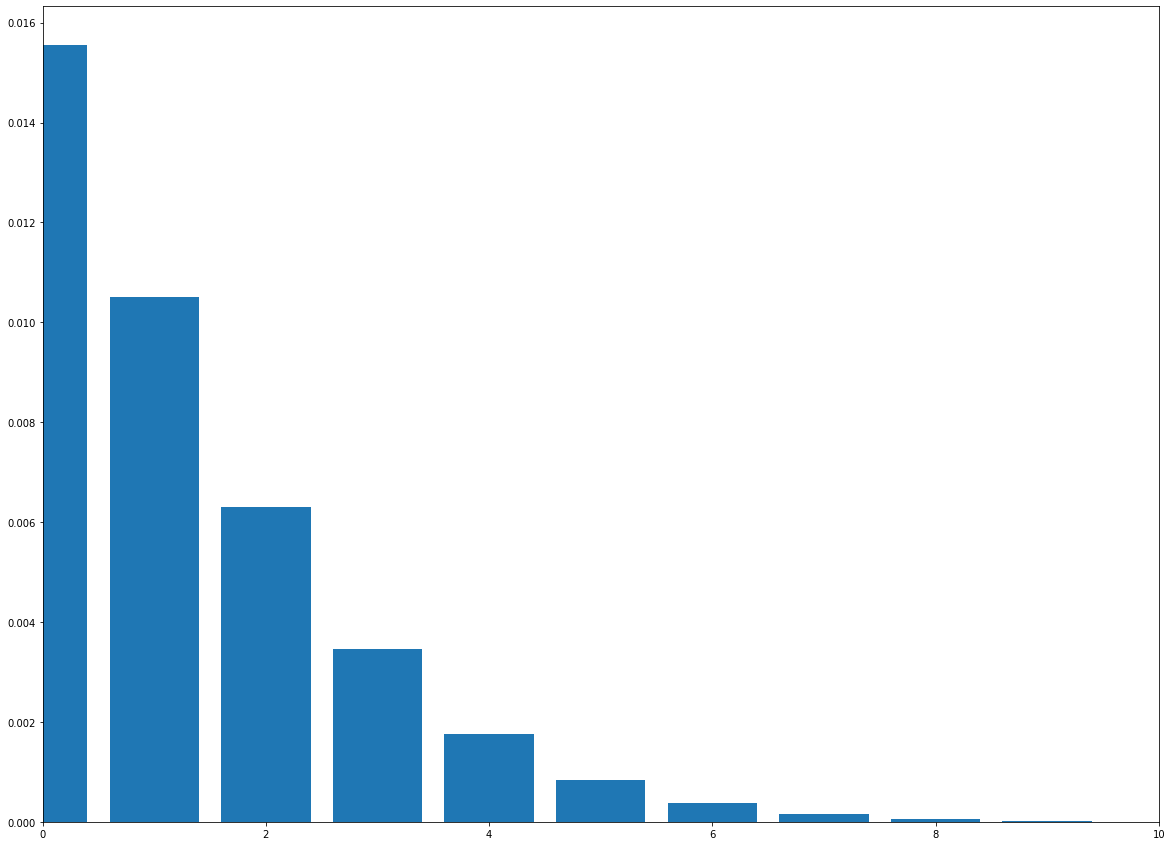

In [125]:
fig, ax = plt.subplots(1, 1)
plt.xlim(0,10)
ax.bar(y,average5)
plt.show()
# 5 day average

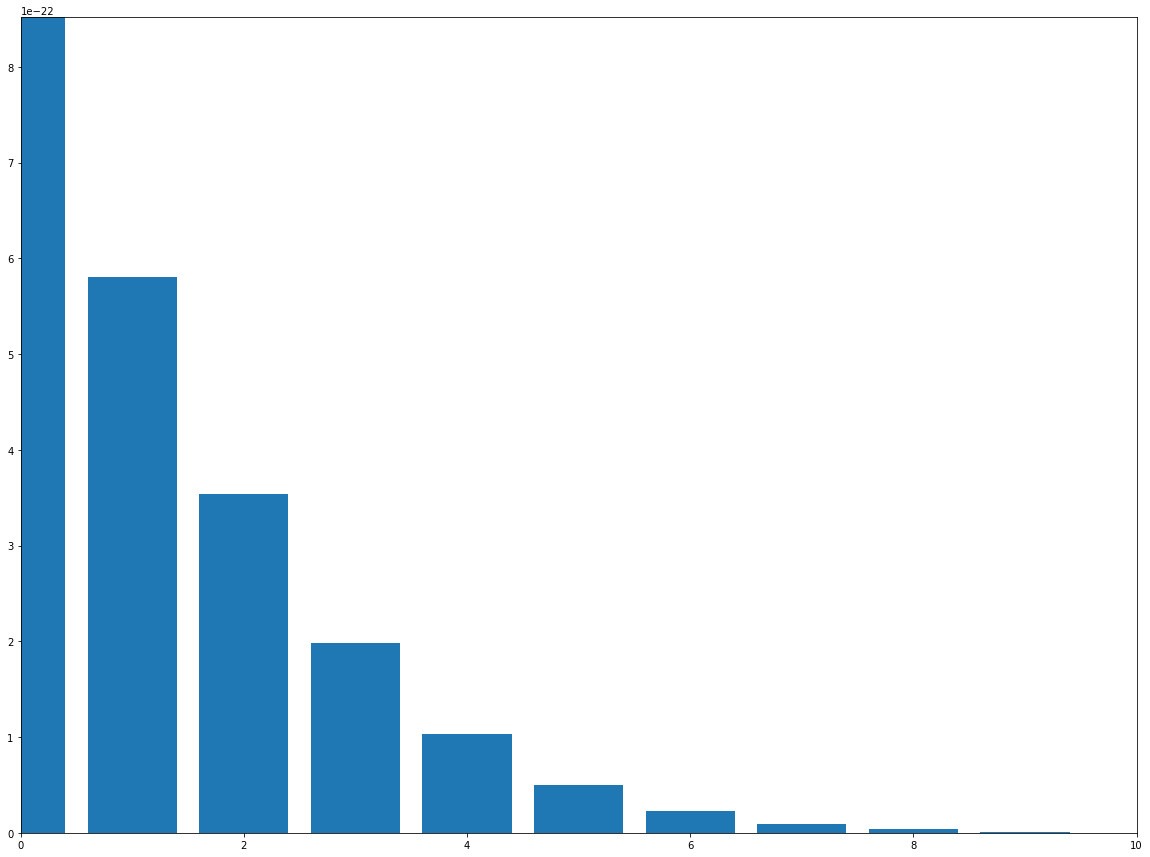

In [127]:
for day in range(1,50):
    average = scipy.signal.convolve(average,base,mode='same')
    #average = np.convolve(average,base)
fig, ax = plt.subplots(1, 1)
plt.xlim(0,10)
ax.bar(y,average)
plt.show()
#55 day average

As days are averaged, the probability distribution appears to become Gaussian. This makes sense because of the central limit theorem, which states that when many independent random variables are added together, their average tends towards a Gaussian distribution. For part B, we weren't taking the average, so it was still a Poisson distribution. It's the process of taking the average that turns it Gaussian.

Part 1D: N = 5, Y = 6

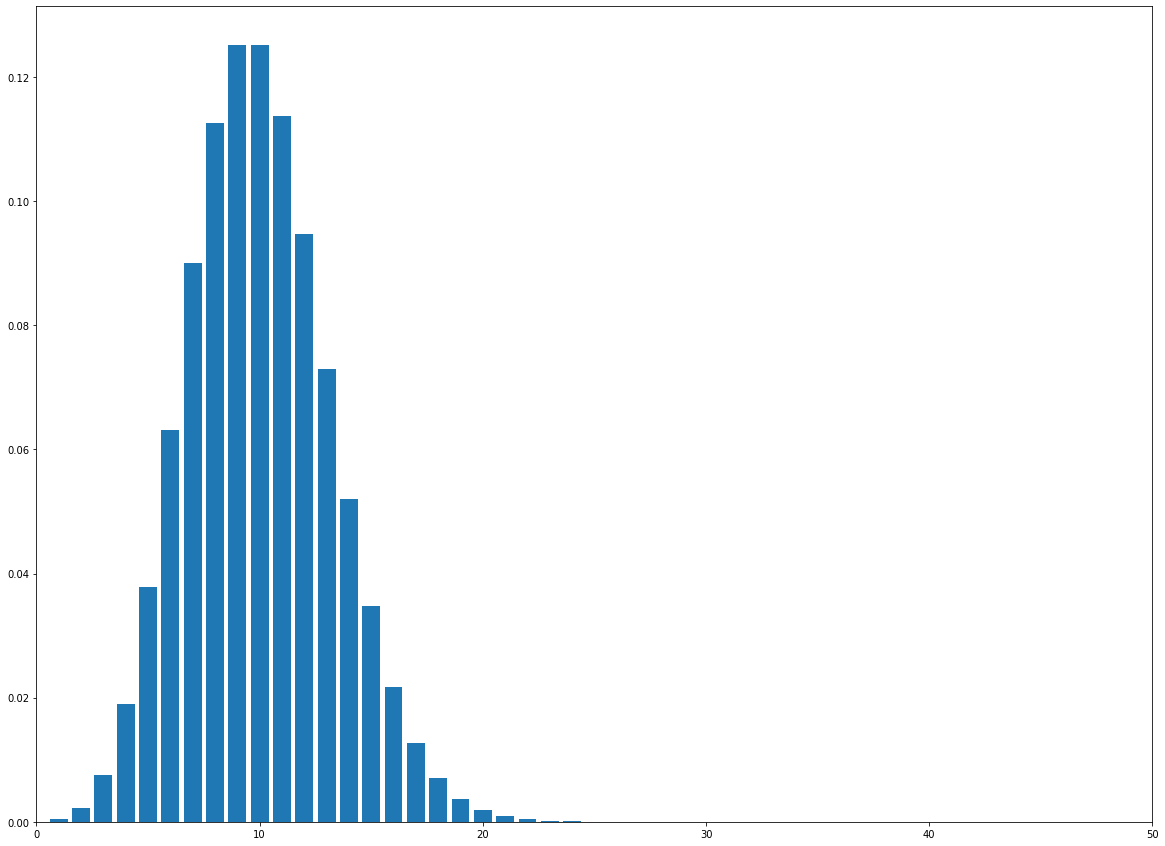

In [131]:

fig, ax = plt.subplots(1, 1)
plt.xlim(0,50)
ax.bar(y3,day5)
plt.show()

For reference, this is the distribution for a 5 day period.

In [136]:
z = scipy.stats.poisson.sf(30,10)
z

7.983794659911252e-08

This is the probability "that the cosmic-ray background would have given you a measurement as signal-like or more than the signal that you received."

In [144]:
20 / scipy.stats.poisson.std(10)

6.324555320336758

The "sigma" value is 6.32 - pretty certain it's not the background noise

Problem 2A:

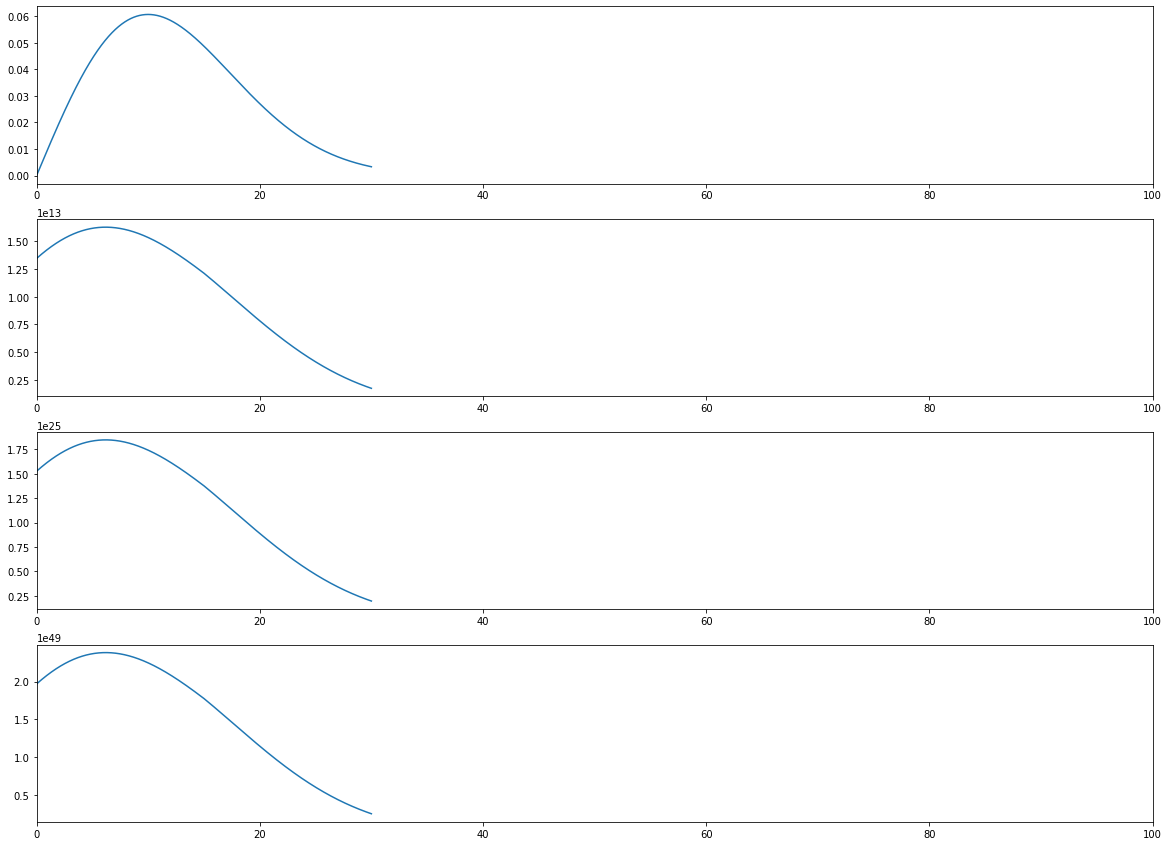

In [202]:
x = np.linspace(0,30,10000)
ray = scipy.stats.rayleigh.pdf(x,loc=0,scale=10)
fig, ax = plt.subplots(4, 1)
ax[0].set_xlim(0,100)
ax[0].plot(x,ray)
ray2 = np.convolve(ray, ray, mode="same")
for i in range(0,5):
    ray2 = np.convolve(ray2, ray, mode="same")
ax[1].plot(x,ray2)
ax[1].set_xlim(0,100)
for i in range(0,5):
    ray2 = np.convolve(ray2, ray, mode="same")
ax[2].plot(x,ray2)
ax[2].set_xlim(0,100)

for i in range(0,5):
    ray2 = np.convolve(ray2, ray, mode="same")
ax[3].plot(x,ray2)
ax[3].set_xlim(0,100)


plt.show()

The graphs show 1,6,11 convolutions.

The shape smooths out and becomes Gaussian around convolution 11.
Problem 3A:

In [273]:
lin = np.linspace(0,100,100000)
# x = Gaussian(0,1)
# y = 5.1
cdf = scipy.stats.norm.cdf(5.1)
x = scipy.stats.norm.ppf(cdf)
x

5.100000000049628

We can claim a discovery.

The statistical question: Given that we have the background distribution of 1 pixel, what is the background distribution of 10000 pixels? We can convolve the distribution of that 1 pixel 10000 times to get the average.


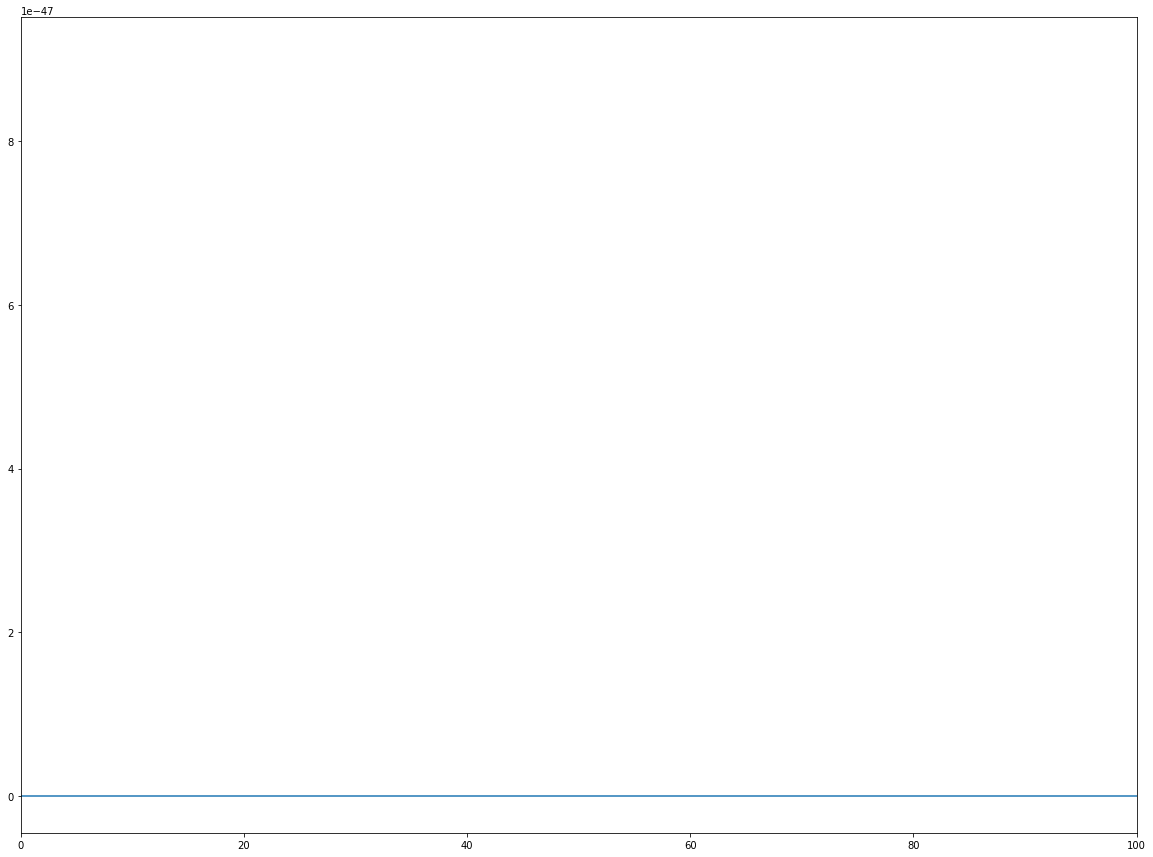

In [272]:
x = np.linspace(0,100,100)
pixel = scipy.stats.norm.pdf(x,loc=10)
background = pixel
for i in range(1,10000):
    background = np.convolve(background, pixel)

fig, ax = plt.subplots(1, 1)
plt.xlim(0,100)
ax.plot(np.linspace(0,990000,990001),background)
plt.show()

In [260]:
np.std(background)

0.0

Somehow, the graph above does not show the expected result. The graph indicates that we should expect 0 probability of any signal. This does not seem right. This problem persists even after trying both numpy and scipy convolve and using both fixed and "expandable" x-axes. 
So, approaching this problem analytically, the central limit theorem suggests that the average of 10000 normally distributed signals would also be normally distributed, with the same mean, and a width of sigma/sqrt(n). 
I will use this assumption going forward.
Therefore,

Part B: The probability distribution is N(0,0.01)

Part C:

In [276]:
lin = np.linspace(0,100,100000)
# x = Gaussian(0,1)
# y = 5.1
cdf = scipy.stats.norm.cdf(5.1,scale=0.01)
x = scipy.stats.norm.ppf(cdf)
x

inf

 It seems almost definite that we have found a signal.

Problem 4A:
The width (standard deviation) we found was 1. So a 5 sigma detection would require a signal of 5 (mean 0 + 5).

Part B: 0.05

Part C: 0.01x brighter. The question implies the signal should be brighter in part B than in part A instead. I don't know what I'm doing wrong here. Reading up about the look-elsewhere effect, it seems to say that if we look at 10k normally distributed pixels one after another, we're bound to find one that meets the threshold for statistical significance. Approaching problem 3 by looking at the distribution of the outcomes instead of the distribution of the background:

The question is whether we can find a signal in a pixel in an image of 10k pixels.
So perhaps we can model this with a binomial distribution: either we find a signal or we don't (Bernoulli trial), with 10k trials and p=5 sigmas in the original distribution.

In [277]:
scipy.stats.norm.sf(5)

2.8665157187919333e-07

This is the p value.
So we have Binomial(10000,2.87e-7). 

In [287]:
scipy.stats.binom.sf(0,10000,scipy.stats.norm.sf(5))

0.0028624115951183656

We have a 0.2% chance of the background giving us a signal. We want to reduce that below 5 sigmas. I don't know how to manipulate p to achieve that. By brute force:

In [303]:
# (a lot of trial and error here)
scipy.stats.binom.sf(0,10000,scipy.stats.norm.sf(6.6))

2.0557886981072672e-07

In [298]:
scipy.stats.norm.sf(5)

2.8665157187919333e-07

Looks like we need a signal of 6.6 or above, roughly. (This is the new answer to part 4B)

In [304]:
6.6 / 5

1.3199999999999998

Part 4C: The signal needs to be 1.32x brighter. 

Part 4D:

In [309]:
scipy.stats.binom.sf(0,100000,scipy.stats.norm.sf(6.9))

2.60012662760857e-07

Roughly, a signal of 6.9 would do in the case of 100k trials. I would say that the sensitivity penalty is low because of the 5 sigma threshold - since the possibility of having a false signal is so low, running more trials wouldn't really penalize us.

Extra credit: I'm guessing it wouldn't really affect the sensitivity penalty because of CLT, which means that the resulting background distribution would be Gaussian anyway.